<title>Author Attribution</title>

<center><h1>Author Attribution</h1></center>

In [119]:
!pip install wordcloud
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import glob, csv
import nltk
import re
import string
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import time
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from string import punctuation
from string import digits
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

<h1>Data Preprocessing</h1>

In [4]:
authors = os.listdir('./data/C50train')
print(authors)
print(len(authors))

['AaronPressman', 'AlanCrosby', 'AlexanderSmith', 'BenjaminKangLim', 'BernardHickey', 'BradDorfman', 'DarrenSchuettler', 'DavidLawder', 'EdnaFernandes', 'EricAuchard', 'FumikoFujisaki', 'GrahamEarnshaw', 'HeatherScoffield', 'JaneMacartney', 'JanLopatka', 'JimGilchrist', 'JoeOrtiz', 'JohnMastrini', 'JonathanBirt', 'JoWinterbottom', 'KarlPenhaul', 'KeithWeir', 'KevinDrawbaugh', 'KevinMorrison', 'KirstinRidley', 'KouroshKarimkhany', 'LydiaZajc', "LynneO'Donnell", 'LynnleyBrowning', 'MarcelMichelson', 'MarkBendeich', 'MartinWolk', 'MatthewBunce', 'MichaelConnor', 'MureDickie', 'NickLouth', 'PatriciaCommins', 'PeterHumphrey', 'PierreTran', 'RobinSidel', 'RogerFillion', 'SamuelPerry', 'SarahDavison', 'ScottHillis', 'SimonCowell', 'TanEeLyn', 'TheresePoletti', 'TimFarrand', 'ToddNissen', 'WilliamKazer']
50


In [5]:
def dataframe_creation(path):
    labels = []
    docs = []
    #path='./data/C50train/'
    for r, dirs, files in os.walk(path):
         for file in files:
               # print(file)
                with open(os.path.join(r, file), "r") as f:
                    author_text = f.read()
                    author_sentences = author_text.replace('.\n','')
                    docs.append(author_sentences)
                    labels.append(r.replace(path,''))

                    #author_sentences = author_text.split(".\n")
                    #for sentence in author_sentences:
                    #        sentence = sentence.replace('\n', '')
                    #        if sentence.__len__() > 0 and sentence.count(' ') > 1:
                    #            docs.append(sentence)
                    #            labels.append(r.replace(path,''))
                    
    data_dict = dict([('text', docs), ('author', labels)])
    df = pd.DataFrame(data_dict)
    le = preprocessing.LabelEncoder()
    df['author_label'] = le.fit_transform(df.author)
    df['id'] = df.index
    
    return df
                             
            

In [6]:
df_trainset=dataframe_creation('./data/C50train/')

In [7]:
#print(df_trainset)

In [8]:
eng_stopwords = set(stopwords.words("english"))
#df_trainset["num_words"] = df_trainset["text"].apply(lambda x: len(str(x).split()))
#df_trainset["num_unique_words"] = df_trainset["text"].apply(lambda x: len(set(str(x).split())))
#df_trainset["num_chars"] = df_trainset["text"].apply(lambda x: len(str(x)))
#df_trainset["num_stopwords"] = df_trainset["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#df_trainset["num_punctuations"] =df_trainset['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
#df_trainset["mean_word_len"] = df_trainset["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#df_trainset["num_words_upper"] = df_trainset["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))


In [9]:
stop_words = stopwords.words('english')
eng_stop_words=list(ENGLISH_STOP_WORDS)
my_stop_words=['fax']
eng_stop_words.extend(my_stop_words)
stopwords_dict = Counter(stop_words)
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def stop_word_rem_and_lemmatization(text):
    lemm_text=[]
    #stop_words_cleaned_text=[word for word in text.split() if word not in stopwords_dict]
    
    
    for word,tag in pos_tag(text.split()):
        lemm_text.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
    #lemm_text=[word for word in lemm_text if word not in eng_stop_words]
    return " ".join(lemm_text).lower()

    

In [10]:
remove_digits = str.maketrans('', '', digits)

def preprocessData(text):
    #Text lemmatization and stop words removal
    sentence=stop_word_rem_and_lemmatization(text)
    #print(sentence)
    
    
    #remove dots between abbreviations, U.S.A--> USA
    sentence=re.sub('\.(?!(\S[^. ])|\d)', '', sentence)
    
    #pad punctuations with spaces
    sentence = re.sub('([.,!;"?\'~#()&/{}_<>:|\-\*$])', r' \1 ', sentence)
         
    #remove all characters less than or equal to two characters
    #sentence=re.sub(r'\b\w{1,2}\b', '', sentence)
    
    #remove all digits
    #sentence = ''.join([i for i in sentence if not i.isdigit()])
    sentence = sentence.translate(remove_digits)
    
    for ch in punctuation+'*()[]^@+=_/\$%-.,':
        sentence = sentence.replace(ch,'')
    
    #remove multiple whitespaces
    sentence= re.sub(' +', ' ', sentence)
    
    #sentence=re.sub('[^A-Za-z0-9\s]+', '', sentence)
            
    return sentence
            

In [11]:
df_trainset["preprocessed_text"] = df_trainset["text"].apply(lambda x: preprocessData(str(x)))


In [12]:
#df_trainset["preprocessed_text"]

Text(0.5, 1.0, '30 most frequent words before preprocessing')

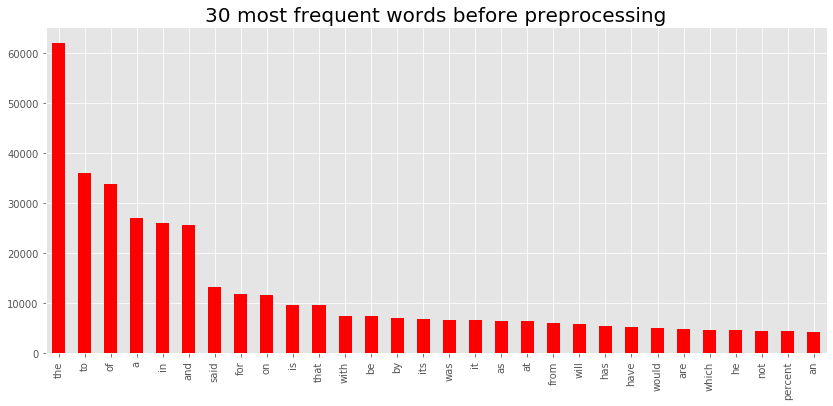

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df_trainset["text"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "red")
plt.title("30 most frequent words before preprocessing",size=20)

Text(0.5, 1.0, '30 most frequent words after preprocessing')

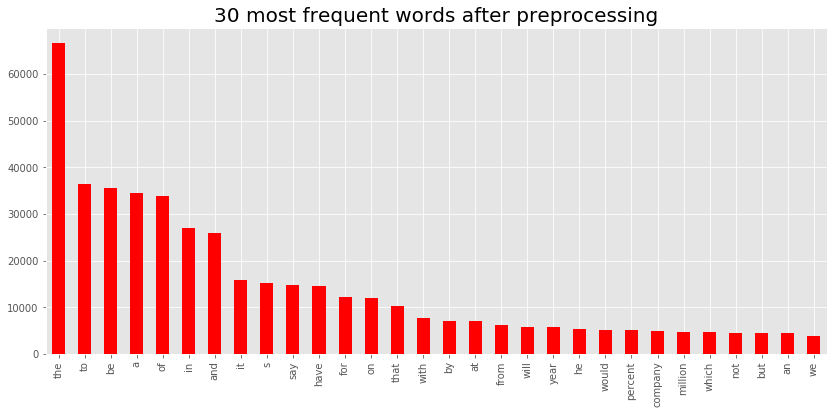

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df_trainset["preprocessed_text"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "red")
plt.title("30 most frequent words after preprocessing",size=20)

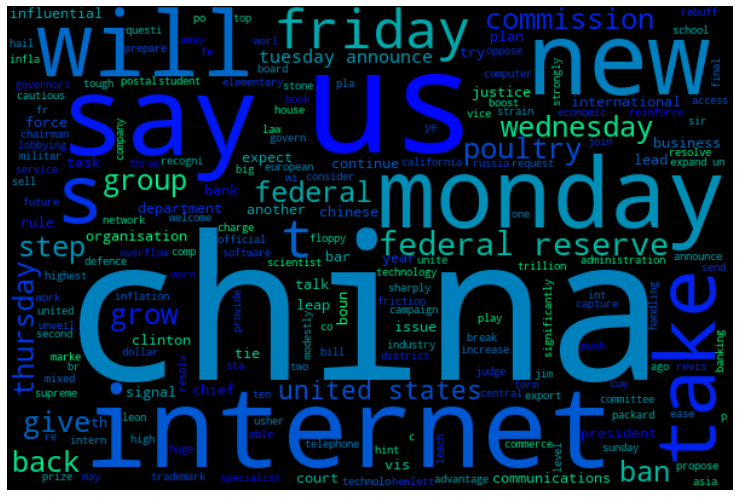

In [15]:
cloud=WordCloud(colormap="winter",width=600,height=400).generate(str(df_trainset["preprocessed_text"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [16]:
df_testset=dataframe_creation('./data/C50test/')

In [17]:
df_testset["preprocessed_text"] = df_testset["text"].apply(lambda x: preprocessData(str(x)))


<h1>Feature Selection</h1>


<h3>1. Bag of Words</h3>

The Bag of words (BoW) model captures the frequencies of the word occurrences in a text corpus.
Bag of words is not concerned about the order in which words appear in the text; instead, it only cares about which words appear in the text

In [18]:
vectorizer_cnt = CountVectorizer(token_pattern=r'\b\w+\b',ngram_range=(1,1))
train_matrix_cnt = vectorizer_cnt.fit_transform(df_trainset['preprocessed_text'])
test_matrix_cnt = vectorizer_cnt.transform(df_testset['preprocessed_text'])
print(train_matrix_cnt.shape)

(2500, 41270)


<h3>2. TF-IDF</h3>

TF-IDF stands for Term Frequency, Inverse Document Frequency.TF-IDF measures how important a particular word is with respect to a document and the entire corpus.
Term frequency is the measure of the counts of each word in a document out of all the words in the same document.<br/>
<b>TF(w) = (number of times word w appears in a document) / (total number of words in the document)</b><br/>

IDF is a measure of the importance of a word, taking into consideration the frequency of the word throughout the corpus.
It measures how important a word is for the corpus.<br/>
<b>IDF(w) = log(total number of documents / number of documents with w in it)</b><br/>

Finally, to calculate TF-IDF, we multiply these two factors – TF and IDF.<br/>
<b>TF-IDF(w) = TF(w) x IDF(w)</b>

In [19]:
vectorizer_tf=TfidfVectorizer(norm = 'l2',min_df = 0, use_idf = True, smooth_idf = False, sublinear_tf = True,
                             ngram_range=(2,3), max_features = 15000,token_pattern=r'\b\w+\b',analyzer='word')

train_matrix_tf_idf = vectorizer_tf.fit_transform(df_trainset['preprocessed_text'])
test_matrix_tf_idf = vectorizer_tf.transform(df_testset["preprocessed_text"])

print((train_matrix_tf_idf.shape))

(2500, 15000)


<h3>3. Chi - Square</h3>

The chi-squared statistic measures the lack of independence between a feature (a word in the author's text) and class (author).
Since what chi-square measures is lack of independence between a feature and class, if a feature has high chi-squared score compared to other features, it means that the feature is useful to predict the class.
Let us print the top 20 features that are useful in predicting the class

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, '$\\chi^2$')

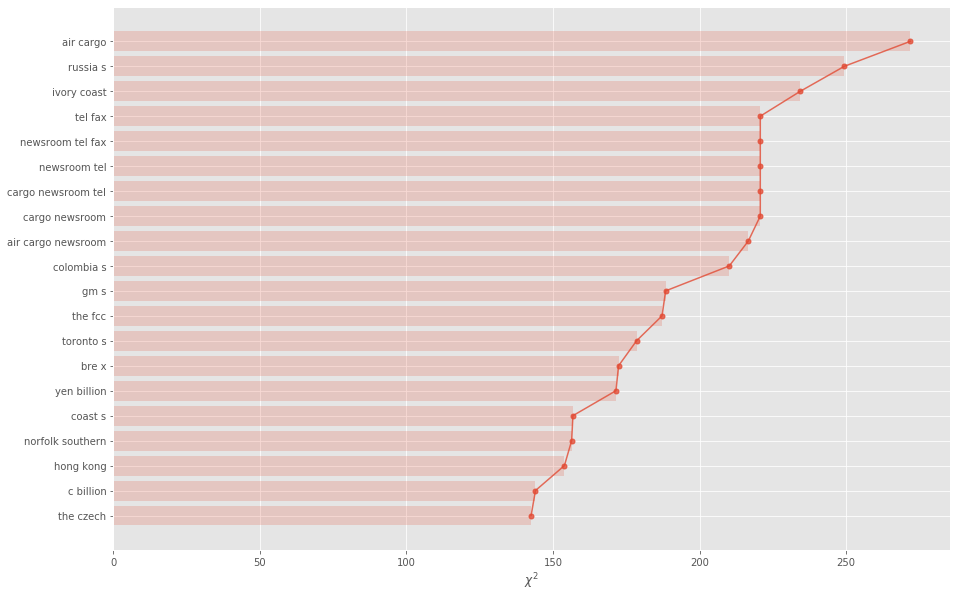

In [20]:

from matplotlib import pyplot as plt
chi2score = chi2(train_matrix_tf_idf, df_trainset['author_label'])[0]

plt.figure(figsize=(15,10))
wscores = zip(vectorizer_tf.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

The most useful feature selected by Chi is 'Air cargo', which occurs 80 times in Jim Glichrist's article. The second best feature is 'ivory coast' which occurs over 39 times in Mathew Bunce articles. It looks like Mr. Bunce writes exclusively on ivory coast. Chi quare takes only a vector as an input, hence let us pass the vector obtained from TF-IDF as input to Chi.

In [21]:
#chi2score = chi2(train_matrix, y_train)[0]
ch2 = SelectKBest(chi2, k=10000)
train_matrix_chi2 = ch2.fit_transform(train_matrix_tf_idf,df_trainset['author_label'])
test_matrix_chi2 = ch2.transform(test_matrix_tf_idf)
print(train_matrix_chi2.shape)

(2500, 10000)


In [22]:
results_list=[]
def insert_results(classification_dict,name):
    accuracy=np.round(classification_dict['accuracy']*100,2)
    f1_score=np.round(classification_dict['weighted avg']['f1-score']*100,2)
    precision=np.round(classification_dict['weighted avg']['precision']*100,2)
    results_list.append({name:{'Accuracy':accuracy,'F1 score':f1_score,'Precision':precision}})
    
    
    

<h2>Dimensionality Reduction (SVD)</h2>

In [23]:
svd = TruncatedSVD(n_components=2000,random_state=42)
train_matrix_tf_svd=svd.fit_transform(train_matrix_tf_idf)
test_matrix_tf_svd=svd.transform(test_matrix_tf_idf)

In [24]:
X_train_vectorizors=[train_matrix_cnt,train_matrix_tf_idf,train_matrix_chi2,train_matrix_tf_svd]
X_test_vectorizors=[test_matrix_cnt,test_matrix_tf_idf,test_matrix_chi2,test_matrix_tf_svd]
X_labels=['Count Vectorizer','TF-IDF','TF-IDF + CHI2','SVD']
y_train = df_trainset['author_label']
y_test = df_testset['author_label']

<h2>Classification Algorithms</h2>

<h3>KNN Algorithm</h3>

In [25]:

acc_list=[]
prec_list=[]
f1_list=[]
acc_all_model=[]
k=30
cat_names = ['True -ve','False +ve','False -ve','True +ve']

for i in range(4):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    print("----------------------------------------------")
    print("FOR VECTORIZOR "+X_labels[i])

    for m in ['manhattan',
              'euclidean','cosine']:

        classifier = KNeighborsClassifier(n_neighbors=k,algorithm='auto',metric=m) #Using brute-force algorithm for quicker computation.
        classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
        predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

        confusion_mat = confusion_matrix(y_test, predicted_label)
        class_report = classification_report(y_test, predicted_label)
        class_report_dict = classification_report(y_test, predicted_label,output_dict=True)
        acc_list.append({m:np.round(class_report_dict['accuracy']*100,2)})
        f1_list.append({m:np.round(class_report_dict['weighted avg']['f1-score']*100,2)})
        prec_list.append({m:np.round(class_report_dict['weighted avg']['precision']*100,2)})
        if(i==2 and m=='cosine'):
            #acc_all_model.append({'knn':np.round(class_report_dict['accuracy']*100,2)})
            insert_results(class_report_dict,'KNN')
        print("\nClassification Report for metric = {} is:\n".format(m))
        print(class_report)
        names=[]
        names.append("KNN")

----------------------------------------------
FOR VECTORIZOR Count Vectorizer


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Classification Report for metric = manhattan is:

              precision    recall  f1-score   support

           0       0.79      0.30      0.43        50
           1       0.50      0.62      0.55        50
           2       0.00      0.00      0.00        50
           3       0.62      0.10      0.17        50
           4       0.29      0.32      0.30        50
           5       0.50      0.18      0.26        50
           6       1.00      0.06      0.11        50
           7       0.44      0.08      0.14        50
           8       0.04      0.72      0.08        50
           9       0.25      0.12      0.16        50
          10       1.00      0.08      0.15        50
          11       0.74      0.40      0.52        50
          12       0.35      0.18      0.24        50
          13       0.50      0.04      0.07        50
          14       0.00      0.00      0.00        50
          15       0.26      1.00      0.42        50
          16       0.88      0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Classification Report for metric = euclidean is:

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        50
           1       0.13      0.66      0.22        50
           2       0.15      0.10      0.12        50
           3       0.32      0.32      0.32        50
           4       0.40      0.38      0.39        50
           5       0.47      0.32      0.38        50
           6       0.50      0.04      0.07        50
           7       0.47      0.18      0.26        50
           8       0.10      0.36      0.15        50
           9       0.36      0.10      0.16        50
          10       0.80      0.24      0.37        50
          11       0.61      0.56      0.58        50
          12       0.24      0.18      0.21        50
          13       0.23      0.32      0.27        50
          14       0.18      0.12      0.14        50
          15       0.29      0.92      0.44        50
          16       0.61      0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Classification Report for metric = manhattan is:

              precision    recall  f1-score   support

           0       0.82      0.18      0.30        50
           1       1.00      0.02      0.04        50
           2       0.00      0.00      0.00        50
           3       0.67      0.04      0.08        50
           4       0.00      0.00      0.00        50
           5       1.00      0.02      0.04        50
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        50
           8       0.02      0.40      0.05        50
           9       0.00      0.00      0.00        50
          10       0.00      0.00      0.00        50
          11       1.00      0.04      0.08        50
          12       1.00      0.04      0.08        50
          13       0.00      0.00      0.00        50
          14       0.00      0.00      0.00        50
          15       0.03      1.00      0.06        50
          16       0.00      0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Classification Report for metric = manhattan is:

              precision    recall  f1-score   support

           0       0.49      0.42      0.45        50
           1       0.36      0.40      0.38        50
           2       0.00      0.00      0.00        50
           3       0.80      0.08      0.15        50
           4       0.10      0.02      0.03        50
           5       1.00      0.04      0.08        50
           6       0.00      0.00      0.00        50
           7       1.00      0.02      0.04        50
           8       0.09      0.26      0.14        50
           9       1.00      0.02      0.04        50
          10       1.00      0.02      0.04        50
          11       1.00      0.06      0.11        50
          12       0.03      0.52      0.05        50
          13       0.62      0.10      0.17        50
          14       0.00      0.00      0.00        50
          15       0.06      1.00      0.11        50
          16       1.00      0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Classification Report for metric = manhattan is:

              precision    recall  f1-score   support

           0       0.01      0.20      0.02        50
           1       0.28      0.22      0.24        50
           2       0.00      0.00      0.00        50
           3       0.03      0.38      0.05        50
           4       0.57      0.26      0.36        50
           5       0.00      0.00      0.00        50
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        50
          10       1.00      0.10      0.18        50
          11       0.00      0.00      0.00        50
          12       1.00      0.08      0.15        50
          13       0.00      0.00      0.00        50
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00        50
          16       0.73      0

<h5>Comparision of accuracy of knn models for different distance measures and Vectorizors</h5>

In [26]:
df_acc=pd.DataFrame(acc_list)
df_acc = df_acc.apply(lambda x: pd.Series(x.dropna().values))
df_acc.index=X_labels
df_acc.style.highlight_max(color = 'lightblue', axis = 0)

,cosine,euclidean,manhattan
Count Vectorizer,40.04,36.08,22.72
TF-IDF,61.28,61.28,5.2
TF-IDF + CHI2,60.52,48.88,12.08
SVD,61.04,58.52,4.76


<h5>Comparision of precision of knn models for different distance measures and Vectorizors</h5>

In [27]:
df_prec=pd.DataFrame(prec_list)
df_prec = df_prec.apply(lambda x: pd.Series(x.dropna().values))
df_prec.index=X_labels
df_prec.style.highlight_max(color = 'lightblue', axis = 0)

,cosine,euclidean,manhattan
Count Vectorizer,50.79,48.76,59.26
TF-IDF,62.93,62.93,21.44
TF-IDF + CHI2,61.91,65.36,41.69
SVD,62.81,61.79,19.12


<h5>Comparision of F1-score of knn models for different distance measures and Vectorizors</h5>

In [28]:
df_prec=pd.DataFrame(f1_list)
df_prec = df_prec.apply(lambda x: pd.Series(x.dropna().values))
df_prec.index=X_labels
df_prec.style.highlight_max(color = 'lightblue', axis = 0)

,cosine,euclidean,manhattan
Count Vectorizer,40.55,35.12,24.53
TF-IDF,60.31,60.31,3.74
TF-IDF + CHI2,59.45,51.3,10.15
SVD,60.1,57.61,4.16


From the results above it is clear that TF-IDF and SVD give higher F1-scores compared to other methods. Hence to speed up the evaluation lets reset the vector list to contain only these two

In [29]:
X_train_vectorizors=[train_matrix_tf_idf,train_matrix_tf_svd]
X_test_vectorizors=[test_matrix_tf_idf,test_matrix_tf_svd]
X_labels=['TF-IDF','SVD']
y_train = df_trainset['author_label']
y_test = df_testset['author_label']

<h2>Logistic Regression</h2>

In [30]:
#from sklearn.model_selection import GridSearchCV
#LR = LogisticRegression()
#LRparam_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#    'penalty': ['l2'],
#    'max_iter': list(range(100,200,100)),
#    'solver': ['newton-cg', 'lbfgs', 'saga']
#}
#LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)
#LR_search.fit(train_matrix_tf_idf , y_train)
#LR_search.best_params_
## summarize
#print('Mean Accuracy: %.3f' % LR_search.best_score_)
#print('Config: %s' % LR_search.best_params_)

The optimal parameters for Logistic regression has been determined using GridSearchCV on the paramers penalty,C,max_iter and solver.
C=1000,max_iter=100, penalty='l2', solver='newton-cg' yielded the best accuracy and hence it will be used.

In [32]:
for i in range(2):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    lr = LogisticRegression(C=1000,max_iter=100, penalty='l2', solver='newton-cg')
    lr.fit(X_train,y_train)
    predictions_lr = lr.predict(X_test)
    print(classification_report(y_test, predictions_lr))
    class_report_dict_lr=classification_report(y_test, predictions_lr,output_dict=True)
    insert_results(class_report_dict_lr,'Logistic Regression + '+X_labels[i])

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        50
           1       0.90      0.56      0.69        50
           2       0.59      0.48      0.53        50
           3       0.57      0.42      0.48        50
           4       0.93      0.76      0.84        50
           5       0.58      0.98      0.73        50
           6       0.38      0.24      0.29        50
           7       0.74      0.28      0.41        50
           8       0.72      0.52      0.60        50
           9       0.80      0.56      0.66        50
          10       1.00      0.98      0.99        50
          11       0.77      0.94      0.85        50
          12       0.31      0.40      0.35        50
          13       0.61      0.62      0.61        50
          14       0.38      0.36      0.37        50
          15       0.98      1.00      0.99        50
          16       0.88      0.86      0.87        50
          17       0.64    

In [ ]:
class_report_dict_lr = classification_report(y_test, predictions_lr,output_dict=True)
#acc_all_model.append({'logistic Regression':np.round(class_report_dict_lr['accuracy']*100,2)})
#insert_results(class_report_dict_lr,'Logistic Regression')
fig, ax = plt.subplots(figsize=(10,13))  
sns.heatmap(pd.DataFrame(class_report_dict_lr).iloc[:-1, :].T, annot=True, linewidths=.4, ax=ax)


<h2>Naive Bayes</h2>

Naive bayes assumes strong (naive) independence assumptions between the features. Hence, its not appropriate to apply it on SVD dataset. We will apply it only on TF-IDF vector

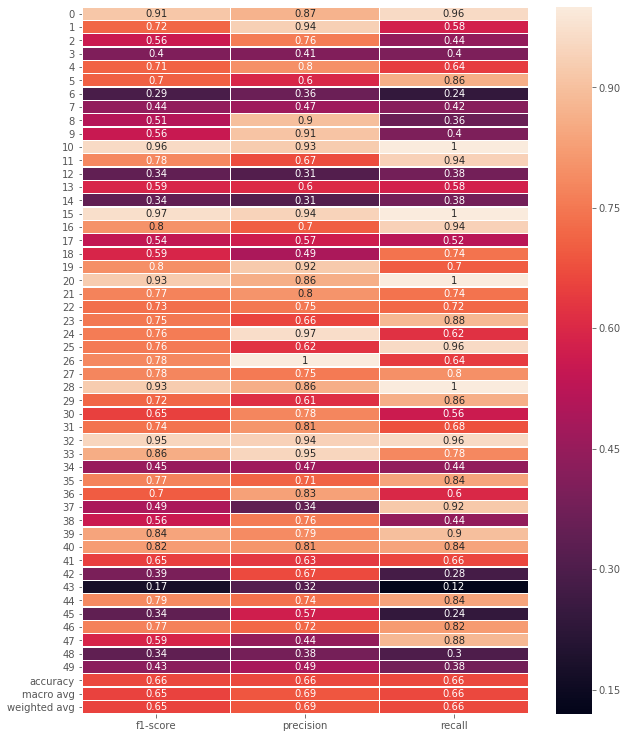

In [36]:
nby = MultinomialNB(alpha=1.0,fit_prior=True, class_prior=None)
nby.fit(train_matrix_tf_idf,y_train)
predictions_nbm=nby.predict(test_matrix_tf_idf)

class_report_dict_nb = classification_report(y_test, predictions_nbm,output_dict=True)
#acc_all_model.append({'Naive Bayes':np.round(class_report_dict_nb['accuracy']*100,2)})

insert_results(class_report_dict_nb,'Naive Bayes')
fig, ax = plt.subplots(figsize=(10,13))  
sns.heatmap(pd.DataFrame(class_report_dict_nb).iloc[:-1, :].T, annot=True, linewidths=.4, ax=ax)


<h2>Support Vector Machine</h2>

In [139]:
#from sklearn.svm import SVC
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'kernel': ['linear','sigmoid']}
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
#grid.fit(train_matrix_tf_idf, y_train)

In [140]:
#print('Config: %s' % grid.best_params_)

In [155]:
svm = svm.SVC(probability=True, kernel="sigmoid",gamma=1,C=100)
for i in range(2):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    
    svm.fit(X_train,y_train)
    prediction_svm = svm.predict(X_test)
    print(classification_report(y_test, prediction_svm))
    class_report_dict_svm = classification_report(y_test, prediction_svm,output_dict=True)
    insert_results(class_report_dict_svm,'SVM + '+X_labels[i])


              precision    recall  f1-score   support

           0       0.83      0.96      0.89        50
           1       0.87      0.52      0.65        50
           2       0.43      0.46      0.45        50
           3       0.69      0.36      0.47        50
           4       0.86      0.74      0.80        50
           5       0.42      0.96      0.59        50
           6       0.46      0.24      0.32        50
           7       0.71      0.24      0.36        50
           8       0.63      0.62      0.63        50
           9       0.73      0.54      0.62        50
          10       1.00      0.92      0.96        50
          11       0.77      0.86      0.81        50
          12       0.32      0.40      0.35        50
          13       0.58      0.52      0.55        50
          14       0.38      0.30      0.33        50
          15       1.00      0.98      0.99        50
          16       0.95      0.72      0.82        50
          17       0.56    

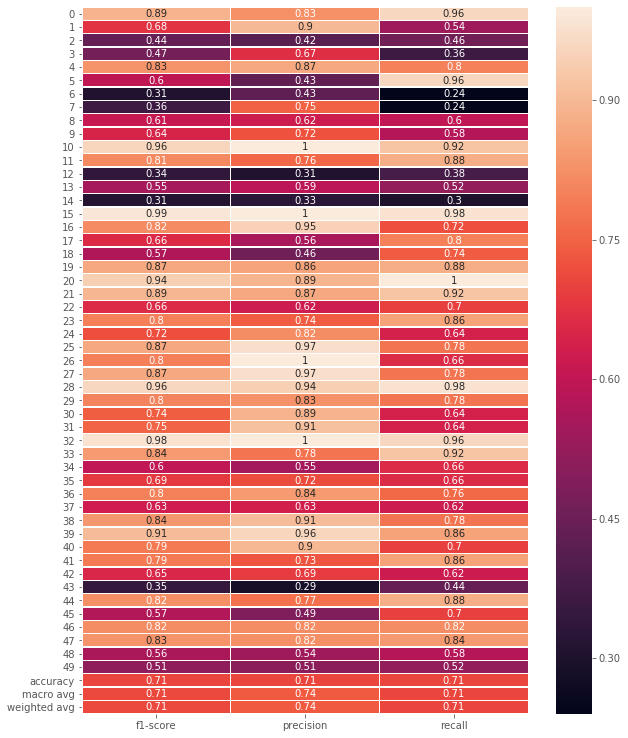

In [156]:
fig, ax = plt.subplots(figsize=(10,13))  
sns.heatmap(pd.DataFrame(class_report_dict_svm).iloc[:-1, :].T, annot=True, linewidths=.4, ax=ax)


<h3>Random Forest</h3>

We will perform random forest only with TF-IDF as random forest running infinitly with SVD

In [157]:
clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42,max_features=2000)
for i in range(1):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    clf.fit(X_train,y_train)
    prediction_rand = clf.predict(X_test)
    print(classification_report(y_test, prediction_rand))
    class_report_dict_rand = classification_report(y_test, prediction_rand,output_dict=True)
    insert_results(class_report_dict_rand,'Random Forest '+X_labels[i])

              precision    recall  f1-score   support

           0       0.57      0.74      0.64        50
           1       0.81      0.58      0.67        50
           2       0.58      0.38      0.46        50
           3       0.57      0.32      0.41        50
           4       0.74      0.40      0.52        50
           5       0.55      0.70      0.61        50
           6       0.28      0.32      0.30        50
           7       0.86      0.12      0.21        50
           8       0.29      0.18      0.22        50
           9       0.27      0.24      0.26        50
          10       0.79      0.96      0.86        50
          11       0.63      0.80      0.71        50
          12       0.24      0.26      0.25        50
          13       0.53      0.48      0.51        50
          14       0.34      0.44      0.39        50
          15       1.00      1.00      1.00        50
          16       0.72      0.76      0.74        50
          17       0.34    

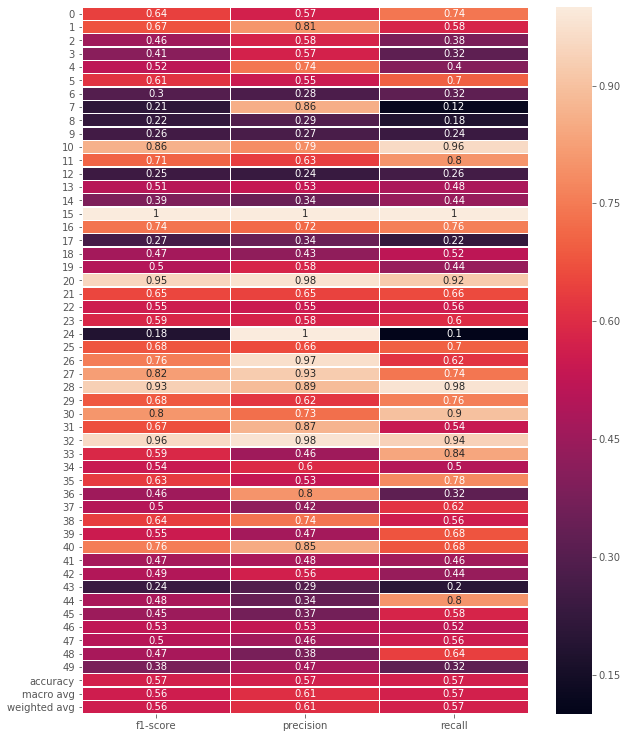

In [158]:
fig, ax = plt.subplots(figsize=(10,13))  
sns.heatmap(pd.DataFrame(class_report_dict_rand).iloc[:-1, :].T, annot=True, linewidths=.4, ax=ax)


<h2>Results</h2>

In [212]:
df_results=pd.concat([pd.DataFrame(l) for l in results_list],axis=1)
df_results

,Logistic Regression + TF-IDF,Logistic Regression + SVD,KNN,Logistic Regression + TF-IDF,Logistic Regression + SVD
Accuracy,72.36,72.36,60.60,72.76,72.76
F1 score,72.04,72.04,59.51,72.53,72.53
Precision,73.85,73.85,61.88,74.43,74.43


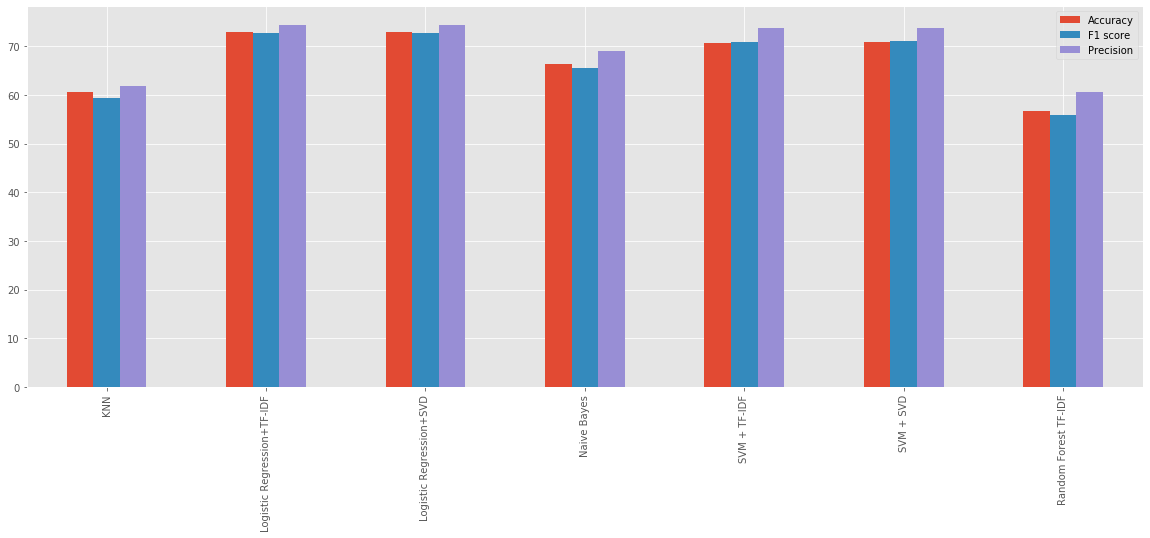

In [160]:
plt.rcParams["figure.figsize"] = (20,7)
df_results.T.plot.bar() 